## Lab | Cleaning categorical data 

* Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

* Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
# apply operations from the previous lab
customer_df.columns = [i.lower().replace(' ', '_') for i in customer_df.columns]
customer_df = customer_df.rename(columns = {'employmentstatus' : 'employment_status'})
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['income'] = customer_df['income'].replace(0, round(np.mean(customer_df['income'])))
customer_df.set_index('customer', inplace = True)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,37657,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,37657,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
def split_to_types(x):
    continuous = []
    discrete = []
    categorical = []
    for col in x:
        if x[col].dtype == np.object:
            categorical.append(col)
        else:
            if x[col].nunique() > 250:
                continuous.append(col)
            else:
                discrete.append(col)
    return x[continuous], x[discrete], x[categorical]

In [5]:
continuous_df, discrete_df, categorical = split_to_types(customer_df)

* Plot a correlation matrix, what can you see?

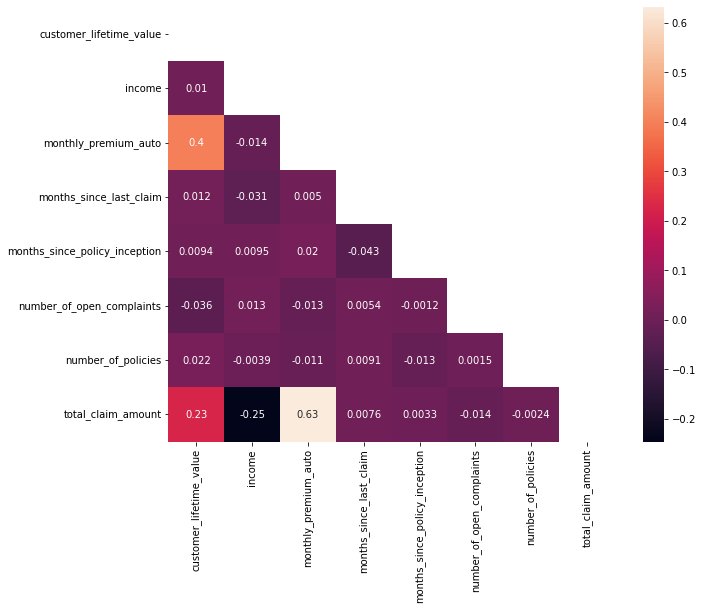

In [6]:
corr_matrix = customer_df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()
# there is relatively high correlation between monthly_premium_auto and 
# total_claim_amount (also with customer_lifetime_value)

* Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
* What can you see in the plots?

In [7]:
# don't need effective_to_date column for plot
discrete_df.drop('effective_to_date', axis = 1, inplace = True)

MONTHLY_PREMIUM_AUTO:


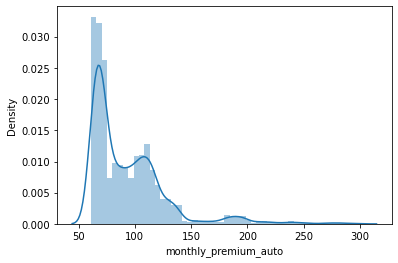

MONTHS_SINCE_LAST_CLAIM:


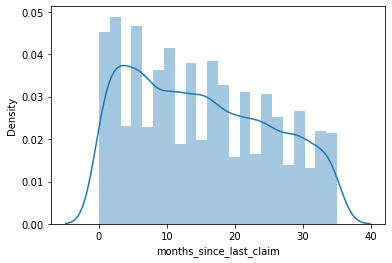

MONTHS_SINCE_POLICY_INCEPTION:


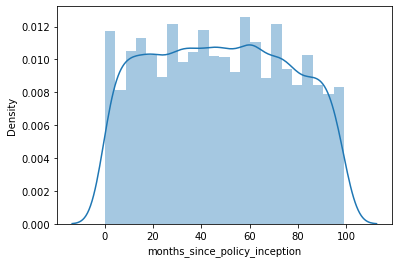

NUMBER_OF_OPEN_COMPLAINTS:


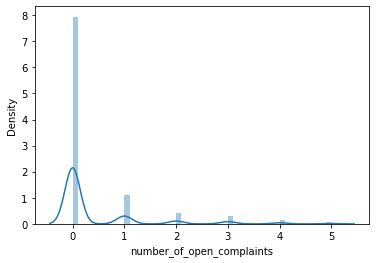

NUMBER_OF_POLICIES:


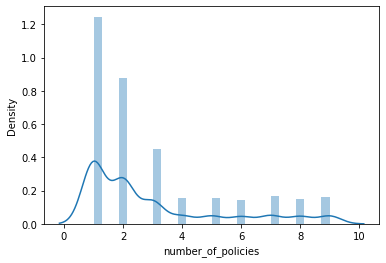

In [8]:
def plot(x):
    for col in x:
        print(f'{col.upper()}:')
        sns.distplot(x[col])
        plt.show()
plot(discrete_df)
# are not normally distributed

CUSTOMER_LIFETIME_VALUE:


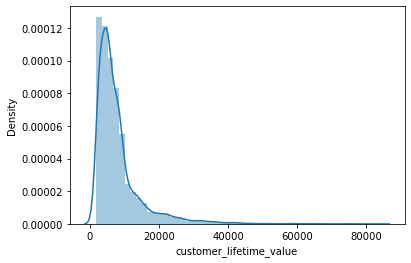

INCOME:


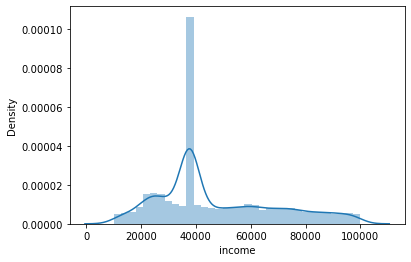

TOTAL_CLAIM_AMOUNT:


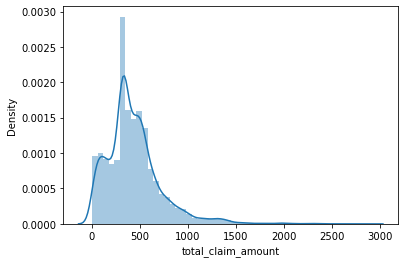

In [9]:
plot(continuous_df)
# are not normal and have outliers

* Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
* Have you found outliers? If you have, what should we do with them?

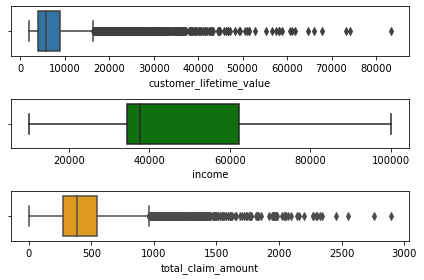

In [10]:
# a good plot to see outliers is boxplot, let's try..
fig, ax = plt.subplots(3,1)
sns.boxplot(continuous_df['customer_lifetime_value'], ax = ax[0])
sns.boxplot(continuous_df['income'], ax = ax[1], color = 'green')
sns.boxplot(continuous_df['total_claim_amount'], ax = ax[2], color = 'orange')
plt.tight_layout()
# customer_lifetime_value and total_claim_amount have outliers, which should be removed

In [11]:
# define the limits
iqr = np.percentile(continuous_df['customer_lifetime_value'], 75) - np.percentile(continuous_df['customer_lifetime_value'], 25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'], 75) + 1.5*iqr
lower_limit = np.percentile(continuous_df['customer_lifetime_value'], 75) - 1.5*iqr
continuous_df['customer_lifetime_value'] = continuous_df[(continuous_df['customer_lifetime_value'] > lower_limit) & (continuous_df['customer_lifetime_value'] < upper_limit)]['customer_lifetime_value']

In [12]:
iqr = np.percentile(continuous_df['total_claim_amount'], 75) - np.percentile(continuous_df['total_claim_amount'], 25)
upper_limit = np.percentile(continuous_df['total_claim_amount'], 75) + 1.5*iqr
lower_limit = np.percentile(continuous_df['total_claim_amount'], 75) - 1.5*iqr
continuous_df['total_claim_amount'] = continuous_df[(continuous_df['total_claim_amount'] > lower_limit) & (continuous_df['total_claim_amount'] < upper_limit)]['total_claim_amount']

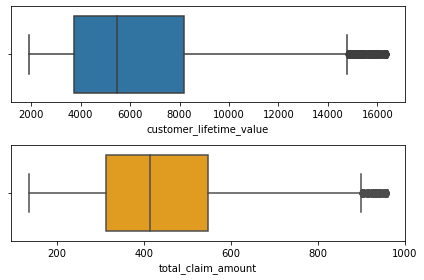

In [13]:
# check
fig, ax = plt.subplots(2,1)
sns.boxplot(continuous_df['customer_lifetime_value'], ax = ax[0])
sns.boxplot(continuous_df['total_claim_amount'], ax = ax[1], color = 'orange')
plt.tight_layout()